In [38]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
from config import weather_api_key
from citipy import citipy
import requests

#create the url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [39]:
#create a set of random latitudes and longitudes as a combination.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [41]:
# create a list for holding the cities
cities = []

#identify the nearest city for each latitude and longitude combo. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #if the city is unique then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count 
len(cities)

604

In [42]:
#create an empty list to hold the weather data. 
city_data = []

#print the beginning of the logging. 
print("Beginning Data Retrieval   ")
print("---------------------------")

#create counters
record_count = 1
set_count = 1

#loop through the cities in out list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count =1
    #create endpoint URL with each city 
    city_url = url + "&q=" + city.replace(" ","+")

    #log the URS, record, and set the numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #add 1 to the record_count 
    record_count +=1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | genc
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | yairipok
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | okha
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | banyo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | auki
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | saint-joseph
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | eyl
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | tsihombe
City not found. Skippi

In [43]:
len(city_data)

553

In [44]:
#convert the list to a df
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Genc,38.7507,40.5603,73.40,21,0,19.57,TR,2021-04-08 11:23:54
1,Qaanaaq,77.4840,-69.3632,4.64,67,100,5.57,GL,2021-04-08 11:23:55
2,Yairipok,24.6667,94.0667,82.40,61,40,9.22,IN,2021-04-08 11:23:55
3,Castro,-24.7911,-50.0119,60.44,90,42,10.89,BR,2021-04-08 11:23:55
4,Bluff,-46.6000,168.3333,48.00,93,4,1.01,NZ,2021-04-08 11:23:56


In [45]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Genc,TR,2021-04-08 11:23:54,38.7507,40.5603,73.40,21,0,19.57
1,Qaanaaq,GL,2021-04-08 11:23:55,77.4840,-69.3632,4.64,67,100,5.57
2,Yairipok,IN,2021-04-08 11:23:55,24.6667,94.0667,82.40,61,40,9.22
3,Castro,BR,2021-04-08 11:23:55,-24.7911,-50.0119,60.44,90,42,10.89
4,Bluff,NZ,2021-04-08 11:23:56,-46.6000,168.3333,48.00,93,4,1.01


In [46]:
#create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#export the city_data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Genc,TR,2021-04-08 11:23:54,38.7507,40.5603,73.40,21,0,19.57
1,Qaanaaq,GL,2021-04-08 11:23:55,77.4840,-69.3632,4.64,67,100,5.57
2,Yairipok,IN,2021-04-08 11:23:55,24.6667,94.0667,82.40,61,40,9.22
3,Castro,BR,2021-04-08 11:23:55,-24.7911,-50.0119,60.44,90,42,10.89
4,Bluff,NZ,2021-04-08 11:23:56,-46.6000,168.3333,48.00,93,4,1.01


In [48]:
#extract the relevant data
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

max_temps

0      73.40
1       4.64
2      82.40
3      60.44
4      48.00
       ...  
548    73.99
549    59.00
550    37.40
551    72.54
552    80.60
Name: Max Temp, Length: 553, dtype: float64

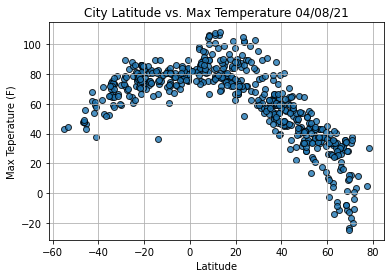

In [49]:
#import the time module
import time

# get totdays date in seconds
#today = datetime.utcfromtimestamp("%x")

#build the scatter plot
plt.scatter(lats,
    max_temps,
    edgecolor="black", linewidth=1, marker ="o",
    alpha=0.8, label="Cities")

#incorporate the other graph parameters
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Teperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the fig
plt.savefig("weather_data/Fig1.png")

#show the plot
plt.show()

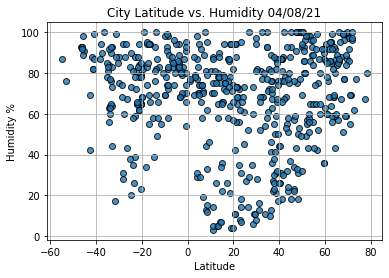

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

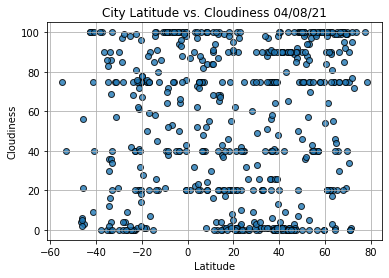

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

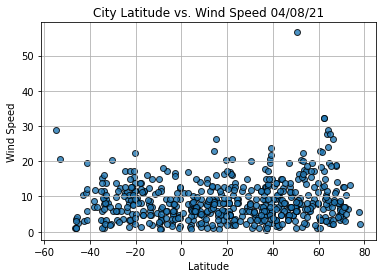

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

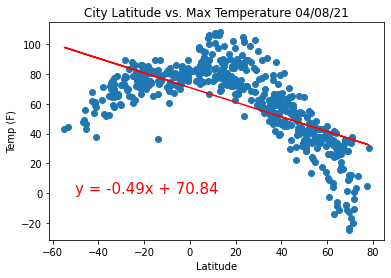

In [66]:
from scipy.stats import linregress
# create a function to create perform linear regression on the weather
#and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
x_values = lats
y_values = max_temps

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,0), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel('Temp (F)')
plt.show()



In [57]:
#calling the information of a column
index_13 = city_data_df.loc[13]
index_13

City                  Yellowknife
Country                        CA
Date          2021-04-08 11:23:58
Lat                        62.456
Lng                     -114.3525
Max Temp                      6.8
Humidity                       85
Cloudiness                     90
Wind Speed                  17.27
Name: 13, dtype: object

In [75]:
#identify the rows that meet the parameter of column "Lat" being >= 0
city_data_df["Lat"] >=0

0       True
1       True
2       True
3      False
4      False
       ...  
548    False
549     True
550    False
551     True
552    False
Name: Lat, Length: 553, dtype: bool

In [115]:
from scipy.stats import linregress

# create a function to create perform linear regression on the weather
#and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)  
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

In [116]:
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df[(city_data_df["Lat"] <= 0)]

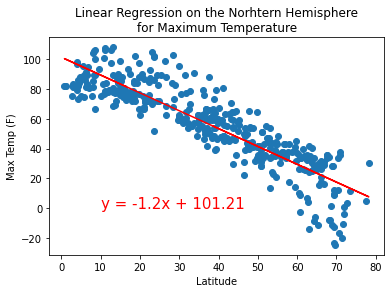

In [122]:
#linear regression on the northern hemi for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 
        "Linear Regression on the Norhtern Hemisphere\n"
        "for Maximum Temperature", 'Max Temp (F)', (10,0))

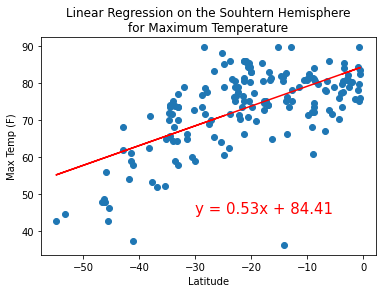

In [123]:
#linear regression on the southern hemi for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 
        "Linear Regression on the Souhtern Hemisphere\n"
        "for Maximum Temperature", 'Max Temp (F)', (-30,45))

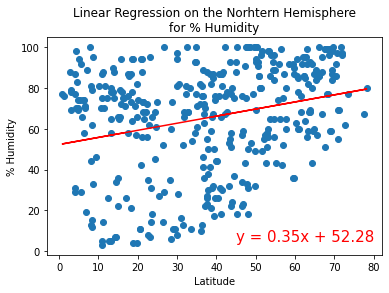

In [120]:
#linear regression on the northern hemi for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values, 
        "Linear Regression on the Norhtern Hemisphere\n"
        "for % Humidity", '% Humidity', (45,5))

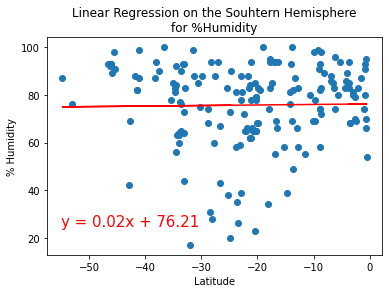

In [126]:
#linear regression on the southern hemi for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values, 
        "Linear Regression on the Souhtern Hemisphere\n"
        "for %Humidity", '% Humidity', (-55,25))